### SQL Project: Analysis payments made during COVID-19 Lockdown on the accounts of vulnerable clients

### Project objective
Analyse payments processed through the accounts of most vulnerable clients during the COVID-19 to potential identify any suspicious or fraudulent transactions.

###  Background and context
To support management in completing monitor development and assess potential exposure to the fraud risk, I will obtain the (i) payments details processed on clients' accounts between end of February and beginning of May 2020, (ii) client information about their age and their country of residence and (ii) COVID-19 fatality and infections numbers by countries which will give an indication worst impacted countries. In the function that I work (Group Internal Audit), I complete continue risk assessment to monitor development of risk and work completed in this project will be leveraged for future monitoring payment risk and determining whether a full  audit review need to be completed.

At the height coronavirus (COVID-19) pandemic fraudsters are using various strategies to extort money or gain access to clients' bank details. The financial hardship experience during the lockdown as some employees are being let go or placed on a furlough scheme is increasing the motivation for perpetrating fraud.  The fraudsters usually target people who may be vulnerable or are isolated by (i) posing as a genuine organisation (i.e. clone firms), (ii) hacking clients' email and instructing payments instructions,  (iii) sending phishing emails which when acted upon results in fraudsters gaining access to sensitive personal information, such as passwords, email logins and banking details etc. and (iv) providing investment and trading advice on profit opportunist  which may result clients transfer assets or money in ventures which they will not be able to recover their investments, amongst other things. With doubt, the UK financial service regulator (the Financial Conduct Authority) will be paying attention on how banks and other financial firms treat their most vulnerable customers during and after the coronavirus pandemic.  As such, it is important that firms payment attention to transactions flowing through the clients' accounts with a view to protecting most vulnerable clients from being targeted by fraudsters. 

#### Sourcing the data 
In order to completed the project I sourced the data from UBS as well as external sources as follows: 

1. COVID-19 fatality and infections numbers by countries data was obtained from the Johns Hopkins University, national public health agencies figures last updated on 24 July 2020.

2. Payments data is a download of payments process in the UBS's payments system multiplied by a random generate factor between 0.95 and 1.05 to anonymise the real data. I dropped any client identifying information and changed original no client identifying references numbers.

3. I also downloaded the client data from the client relationship management database. I dropped any client identifying information such as full name, full address, except for country. The date of birth has been changed by a random number between +/- 30 to anonymise and any reference numbers have been completely changed from their original format.

##### Compliance with data policies
The data that I obtained to complete this project is mainly UBS data. I have complied with the data policy requirement for communicating internal and external and took satisfactory measure to prevent client identifying data from being disclosed external. I have also taken further step to anonymise and alter a residual data that can potential identify with the client. The information discloses in this project cannot be identified with the original data.

#### Motivation for using SQL 
I have create the SQL database from which to run the SQL queries as it is easier to replicate the analysis on new data going forward once the queries have been defined when comparing to excel. Moreover, excel files are (i) not very efficient when dealing with large volume of data and (ii) susceptible to accidental data changes. Excel files have an overall record limit of 1,048,575 and volume of transaction can breach this record limit. Given the expected wider business use of the analysis results, it is essential that the analysis is well documents and SQL provides this through queries. 

### Action plan¶
I will be using the above three Microsoft excel .xlsx files in this notebook, to create a local database which manipulate and analyse using SQL queries. I will apply the SELECT, JOIN, COUNT and SUM statements to obtain useful summary tables to report on the payments. I will use the 'pandas' and 'sqlite3' python packages to execute this notebook.

The initial plan for this project is as follows:
1.	Explore the data
2.	Prepare the data for creating SQL 
3.	Creating an SQL Database
4.	Perform SQL queries and visualise the results 
5.	Conclude on the findings 

### 1. Explore the data

In [1]:
# Import packages
import pandas as pd # package for manipulating data and data frames
import matplotlib.pyplot as plt # package for visualising data
import sqlite3 # package for creating a DB-API interface for SQLite databases so that we can create and SQLite database in Python 

*Reviewing payments of vulnerable clients:*

The UK government has identified individual aged 65 and above as the most vulnerable group if infected by the virus. I will use this information as basis of identifying payments instructed by vulnerable clients residing in the worst impacted countries (also refer to information source above)during the coronavirus period.

In [2]:
# First I import the existing .xlsx files using pandas
# Note that I pass the optional parameter index_col = "Account ID" to immediately assign the column
# as the dataframe index. This provide a neater dataframe.
Client_payments = pd.read_excel("e-Payments_data.xlsx", index_col="Account_id")
Client_Details = pd.read_excel("Client_details_data.xlsx")
Pandemic_data = pd.read_excel("COVID-19_Most_affected_countries.xlsx", header=4, index_col="Country")

I will now explore all imported datasets by viewing the data structure and format. I will start with the Clients_payments data.

In [3]:
Client_payments.head()

Payment_id Payment_type Currency  Payment_Amount  \
Account_id                                                     
52151                1     Domestic      GBP         4735.75   
41602                2     Domestic      GBP          987.00   
45702                3     Domestic      GBP         6856.76   
52136                4     Domestic      GBP         1025.00   
52136                5     Domestic      GBP         1027.00   

            GBP_Payment_Amount  GBP_Exchange_Rate Value_Date  
Account_id                                                    
52151                  4735.75                1.0 2020-02-28  
41602                   987.00                1.0 2020-03-02  
45702                  6856.76                1.0 2020-03-01  
52136                  1025.00                1.0 2020-02-28  
52136                  1027.00                1.0 2020-02-28

The Client_payments file contains the payments transactions executed between the end of February 2020 and beginning of May 2020 and the data table columns descriptions are as follows: 
*	`Account_id` - is the unique number which identifies an account held by a client. As noted in the background section this number has been changed to anonymise the original data,

*	`Payment_id` -is the reference number that uniquely identifies each transaction and again, this has been changed to anonymise the original data,

*	`Payment_type` – a payment is earthier domestic or SWITCH (international) payment,

*	`Currency` - Is the currency in which the payment is being made,

*	`Payment_Amount` - is the currency amount of the payment,	

*	`GBP_Payment_Amount`	 - is the British sterling equivalent amount,

*	`GBP_Exchange_Rate` – is the exchange rate at which the currency amount has been covered to the British sterling equivalent amount, and

*	`Value_Date` – is the date on which a transaction actually takes place.

In [4]:
Client_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5956 entries, 52151 to 24972
Data columns (total 7 columns):
Payment_id            5956 non-null int64
Payment_type          5956 non-null object
Currency              5956 non-null object
Payment_Amount        5956 non-null float64
GBP_Payment_Amount    5956 non-null float64
GBP_Exchange_Rate     5956 non-null float64
Value_Date            5956 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 372.2+ KB


I will now turn to the Client_Details data and view a sample of 5 random rows to understand the data format.

In [5]:
Client_Details.sample(5)

Client_id  Account_id                  DOB Client_type         Desk  \
55506      29369       52236  1976-06-27 00:00:00  Individual        PWM_3   
34672      15299       26832  1941-09-19 00:00:00  Individual            0   
39084      18789       29669  1944-12-27 00:00:00  Individual     Affluent   
41717      21039       35922  1938-10-04 00:00:00  Individual     Affluent   
9174        5275       25543  1950-10-19 00:00:00  Individual  Maintenance   

                          Segment       Country  
55506  WM2: HIGH NET WORTH LONDON            UK  
34672   WM1: CHARITIES & XO DESKS            UK  
39084   WM1: CHARITIES & XO DESKS            UK  
41717   WM1: CHARITIES & XO DESKS            UK  
9174    WM1: CHARITIES & XO DESKS  South Africa

The Client_Details file contains client static data and the data table columns descriptions are as follows:
*	` Client_id ` - is a unique number that identifies each client. A client can hold multiple accounts. As noted in the background section this number has been changed to anonymise the original data,

*	`Account_id` - is the unique number which identifies an account held by a customer,

*	` DOB ` - is the client date of birth,

*	` Client_type ` - a client can either be an individual or Private Commercial,

*	` Desk` - is the desk on which a client is managed,	

*	`Segment` - is the higher level of client segregation and in which the desk are also attached,

*	` Country ` – is the country in which the client resides.

In [6]:
Client_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56816 entries, 0 to 56815
Data columns (total 7 columns):
Client_id      56816 non-null int64
Account_id     56816 non-null int64
DOB            56816 non-null object
Client_type    56816 non-null object
Desk           56816 non-null object
Segment        56816 non-null object
Country        56816 non-null object
dtypes: int64(2), object(5)
memory usage: 3.0+ MB


I am now viewing the table coronavirus pandemic data

In [7]:
Pandemic_data.head()

Deaths  Death_rate  Total_cases  COVID19_Deaths_Country_Rank
Country                                                              
US       144105        44.1      4024718                            1
Brazil    84082        40.1      2287475                            2
UK        45554        67.8       297146                            3
Mexico    41908        33.2       370712                            4
Italy     35092        57.9       245338                            5

The Pandemic_data file contains coronavirus fatality and infections numbers for different countries and the data table columns descriptions are as follows:
*	` Country ` - is the country to which the coronavirus data relate,

*	` Deaths` - are the reported number of deaths caused by coronavirus,

*	` Death_rate ` - is based on the deaths per 100,000 people,

*	` Total_cases ` - is the total number of confirm coronavirus infected cases,

*	` COVID19_Deaths_Country_Rank ` – is the ranking of the worst affected country based on the number of deaths ordered in a descending order

I will combine the three separate spreadsheets into simple and atomic tables for running queries in SQL. 

### 2.	Prepare the data for creating SQL

The Client_payments and Details datasets have the `Account_ID` name as their primary key. However, there is no key available to link the `Pandemic_data` and `Client_details`. As such I will incorporate the country code, based on ISO codes and use this as a key to link the tables in SQL. This will be a foreign key in the `Details` data and a primary key in the ` Pandemic_data `

In [8]:
# importing the Country ISO code file
Country_ISO_codes = pd.read_excel("Country_ISO_codes.xlsx")

Country_ISO_codes.head(1)

Country  Country_ISO_codes
0  Afghanistan                  4

In [9]:
Client_details = Client_Details.merge(Country_ISO_codes, on='Country', how='left')
Details = Client_details.set_index('Account_id')
Details.head(1)

Client_id                  DOB Client_type Desk  \
Account_id                                                    
34413               1  1990-12-19 00:00:00  Individual    0   

                              Segment       Country  Country_ISO_codes  
Account_id                                                              
34413       WM1: CHARITIES & XO DESKS  South Africa                710

In [10]:
Pandemic_details= Pandemic_data.merge(Country_ISO_codes, on='Country', how='left')
Pandemic_details=Pandemic_details.set_index('Country_ISO_codes')
Pandemic_details.head(1)

Country  Deaths  Death_rate  Total_cases  \
Country_ISO_codes                                            
840.0                  US  144105        44.1      4024718   

                   COVID19_Deaths_Country_Rank  
Country_ISO_codes                               
840.0                                        1

### 3. Creating an SQL Database
I will now create a database to contain these three tables as QUERYING the database directly can provide more value than operating directly in excel.

I am creating a new database using `sqlite3.connect`, and then write the tables to the database using the function `pandas.DataFrame.to_sql`.

In [11]:
conn = sqlite3.connect("Payments.db") # creating a connection

I am using the df.to_sql function to create the tables on the empty database. I pass the name of the table as the first parameter, and the connection as the second parameter. Additionally, I am providing the additional parameter `if_exists="replace"`, which will replace the table with the dataframe every time the code below is ran.

In [12]:
# specifying the if_exists="replace" optional parameter to replace the table if already exists
Client_payments.to_sql("ClientPayments", conn, if_exists="replace")
Details.to_sql("Details", conn,  if_exists="replace")
Pandemic_details.to_sql("PandemicDetails", conn, if_exists="replace")

I now need to confirm that the created database has all the tables required using a "special" query of SQLite 3 to retrieve all the table names in our database.

In [13]:
pd.read_sql_query( """
SELECT name FROM sqlite_master
WHERE type='table'
ORDER BY name
""", conn)

name
0   ClientPayments
1          Details
2  PandemicDetails

I am view the payments table to confirm that it has been correctly written in the database.

In [14]:
pd.read_sql_query("""
SELECT * 
FROM ClientPayments
""", conn)

Account_id  Payment_id Payment_type Currency  Payment_Amount  \
0          52151           1     Domestic      GBP         4735.75   
1          41602           2     Domestic      GBP          987.00   
2          45702           3     Domestic      GBP         6856.76   
3          52136           4     Domestic      GBP         1025.00   
4          52136           5     Domestic      GBP         1027.00   
...          ...         ...          ...      ...             ...   
5951       42126        5934     Domestic      GBP            0.06   
5952       46762        5935     Domestic      GBP         1737.12   
5953       46762        5936     Domestic      GBP         2184.24   
5954       12754        5937        SWIFT      USD         5195.00   
5955       24972        5938     Domestic      GBP         7258.34   

      GBP_Payment_Amount  GBP_Exchange_Rate           Value_Date  
0                4735.75             1.0000  2020-02-28 00:00:00  
1                 987.00             1.0000  2020-03-02 00:00:00  
2                6856.76             1.0000  2020-03-01 00:00:00  
3                1025.00             1.0000  2020-02-28 00:00:00  
4                1027.00             1.0000  2020-02-28 00:00:00  
...                  ...                ...                  ...  
5951                0.06             1.0000  2020-05-13 00:00:00  
5952             1737.12             1.0000  2020-05-13 00:00:00  
5953             2184.24             1.0000  2020-05-13 00:00:00  
5954             4212.96             1.2331  2020-05-13 00:00:00  
5955             7258.34             1.0000  2020-05-13 00:00:00  

[5956 rows x 8 columns]

After creating the tables I am moving on to querying report from the database to gain insight of the distribution of payments made from vulnerable clients' accounts across different, segment, desks and clients compared to the overall payments processed during the period. I will pay particular attention to payments made by client residing in the worst affected countries. 

### 4.	Perform SQL queries and visualise the results 

In the steps that follow, perform a number of SQL queries my newly created database and I will then generate reports (dataframes) that will allow me going more insight on the data. 

#### 4.1 Joining all the tables 
I am joining all tables in the database with all their fields in a single query to be able to all the relevant data in one report/ dataframe as looking at the payments table in isolation will not provide information about (i) the client profile and (ii) the current state of the countries in which they are residing in relation to coronavirus infection rates.

I will use the LEFT OUTER JOIN as it fetches all data from the left table with matching data from right, if present.  I need all the transactions data to be returned in the query results as my analysis is on the payments processed.

In [15]:
pd.read_sql_query("""
SELECT c.Account_id, c.Payment_id, c.Payment_type, c.Currency, 
    c.Payment_Amount, c.GBP_Payment_Amount, c.GBP_Exchange_Rate,
    c.Value_Date, d.Client_id, d.DOB, d.Client_type, d.Desk, 
    d.Segment, d.Country, d.Country_ISO_codes, p.COVID19_Deaths_Country_Rank,
    round((julianday(c.Value_Date) - julianday(d.DOB))/365,1) AS Age
FROM ClientPayments c
LEFT OUTER JOIN Details d
ON c.Account_id=d.Account_id
LEFT OUTER JOIN PandemicDetails p
ON d.Country_ISO_codes=p.Country_ISO_codes
""", conn)

Account_id  Payment_id Payment_type Currency  Payment_Amount  \
0          52151           1     Domestic      GBP         4735.75   
1          41602           2     Domestic      GBP          987.00   
2          45702           3     Domestic      GBP         6856.76   
3          52136           4     Domestic      GBP         1025.00   
4          52136           5     Domestic      GBP         1027.00   
...          ...         ...          ...      ...             ...   
5967       42126        5934     Domestic      GBP            0.06   
5968       46762        5935     Domestic      GBP         1737.12   
5969       46762        5936     Domestic      GBP         2184.24   
5970       12754        5937        SWIFT      USD         5195.00   
5971       24972        5938     Domestic      GBP         7258.34   

      GBP_Payment_Amount  GBP_Exchange_Rate           Value_Date  Client_id  \
0                4735.75             1.0000  2020-02-28 00:00:00        128   
1                 987.00             1.0000  2020-03-02 00:00:00      24908   
2                6856.76             1.0000  2020-03-01 00:00:00      22273   
3                1025.00             1.0000  2020-02-28 00:00:00      25584   
4                1027.00             1.0000  2020-02-28 00:00:00      25584   
...                  ...                ...                  ...        ...   
5967                0.06             1.0000  2020-05-13 00:00:00      23531   
5968             1737.12             1.0000  2020-05-13 00:00:00      15097   
5969             2184.24             1.0000  2020-05-13 00:00:00      15097   
5970             4212.96             1.2331  2020-05-13 00:00:00      20735   
5971             7258.34             1.0000  2020-05-13 00:00:00       3184   

                      DOB         Client_type             Desk  \
0     1939-01-07 00:00:00          Individual        Edinburgh   
1     2013-07-15 00:00:00  Private Commercial        Charities   
2     1975-05-13 00:00:00          Individual            Leeds   
3     2017-11-13 00:00:00          Individual       Birmingham   
4     2017-11-13 00:00:00          Individual       Birmingham   
...                   ...                 ...              ...   
5967  1941-10-29 00:00:00          Individual  South_Southwest   
5968  1964-09-25 00:00:00          Individual            Leeds   
5969  1964-09-25 00:00:00          Individual            Leeds   
5970  1961-03-07 00:00:00          Individual             CEEI   
5971  1951-05-01 00:00:00          Individual            NRI/P   

                         Segment      Country  Country_ISO_codes  \
0                WM3: UK REGIONS           UK                826   
1      WM1: CHARITIES & XO DESKS           UK                826   
2                WM3: UK REGIONS           UK                826   
3                WM3: UK REGIONS           UK                826   
4                WM3: UK REGIONS           UK                826   
...                          ...          ...                ...   
5967             WM3: UK REGIONS           UK                826   
5968             WM3: UK REGIONS           UK                826   
5969             WM3: UK REGIONS           UK                826   
5970  WM4: INTERNATIONAL CLIENTS  Switzerland                756   
5971  WM4: INTERNATIONAL CLIENTS           UK                826   

      COVID19_Deaths_Country_Rank   Age  
0                             3.0  81.2  
1                             3.0   6.6  
2                             3.0  44.8  
3                             3.0   2.3  
4                             3.0   2.3  
...                           ...   ...  
5967                          3.0  78.6  
5968                          3.0  55.7  
5969                          3.0  55.7  
5970                         32.0  59.2  
5971                          3.0  69.1  

[5972 rows x 17 columns]

Without further in-depth analysis I can already note that a number of payments were being made by United Kingdom (UK clients). The UK is number three most impacted country based on the reported coronavirus related deaths.  This is not surprising as majority of the clients served by UBS wealth are from the UK. I will now proceed to examining the payments in greater detail by running other queries and visualising the results to get an overall picture data distribution.

#### 4.2 Examining  the number and value of payments made vulnerable client 
I am now proceeding to query report for payments processed on the accounts held by vulnerable clients (defined as clients aged 65 years and above) using the aggregate function COUNT, SUM and AVG. I will further explore the result of the queries with a bar plot. I will start analysis the result at Segment level (highest), then drill down to desk level before finishing with individual clients.

#### Segment level payments queries

In [16]:
Segment_payments_number = pd.read_sql_query("""
SELECT d.Segment, COUNT(c.Payment_id) as number_of_payments,
    SUM(c.GBP_Payment_Amount) as Total_payments,
    ROUND(AVG(GBP_Payment_Amount),2) as Average_payment_amount
FROM ClientPayments c
LEFT OUTER JOIN details d
ON c.Account_id=d.Account_id
LEFT OUTER JOIN PandemicDetails p
ON d.Country_ISO_codes=p.Country_ISO_codes
WHERE COVID19_Deaths_Country_Rank <=15 AND 
(julianday(c.Value_Date) - julianday(d.DOB))/365 >= 65 AND 
d.Client_type = 'Individual'
GROUP BY d.Segment
ORDER BY number_of_payments DESC
""", conn)
Segment_payments_number

Segment  number_of_payments  Total_payments  \
0    WM2: HIGH NET WORTH LONDON                 384     24836459.93   
1               WM3: UK REGIONS                 331     19594005.84   
2     WM1: CHARITIES & XO DESKS                 246     11570991.62   
3  WM5: ULTRA HIGH NET WORTH UK                 132     39200815.07   
4    WM4: INTERNATIONAL CLIENTS                 103     20846140.16   
5              GFIM UK & JERSEY                  34      2439948.54   
6                 GFO WE LONDON                  20      1079401.48   

   Average_payment_amount  
0                64678.28  
1                59196.39  
2                47036.55  
3               296975.87  
4               202389.71  
5                71763.19  
6                53970.07

I am using `matplotlib.pyplot` to create a barplot on the resulting dataframe. I wil create a twin barplot with custom options to observe the distributions of payments for clients over 65 year who 25 transaction or more.

<Figure size 432x288 with 0 Axes>

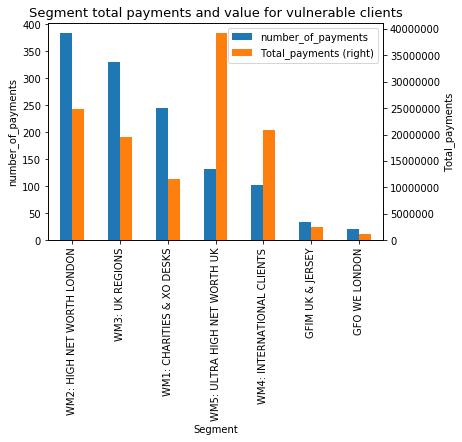

In [17]:
Segment_payments = Segment_payments_number.drop(['Average_payment_amount'], axis=1)
Segment_payments.set_index('Segment', inplace=True)
plt.figure()
ax=Segment_payments.plot(kind='bar', secondary_y=['Total_payments'])
ax.set_ylabel('number_of_payments')
ax.right_ax.set_ylabel('Total_payments')
ax.set_title('Segment total payments and value for vulnerable clients', fontsize=13)
plt.ticklabel_format(style='plain', axis='y') # to repress scientific notation in plot y-axis
plt.show()

Majority of the payments were processed on the High Net Work, UK regions and the Charities & XO segments.  This is in line with expectation as these desks are predominantly servicing clients based in the UK.

The total values of the payments processed by the Ultra-high Net Worth segment are significant higher when compared to the number of payments process. This is in line with expectation as the clients served by that desk usually process high value transactions. However, I did not expect the same outcome for the International Clients segment and as such, the discrepancy need to be looked into.

The next query is to generate a data frame with which includes individual payments made by clients within the top 15 countries affected by COVID 19 as well as those made by vulnerable client (i.e. aged 65 years and over) so as to calculating the percentage of the count of payments made by vulnerable clients. I will use the result to generate another plot with vulnerable payments counts and their percentages.

#### Count of payment by vulnerable clients and percentage of total segment payments

In [18]:
Payments_by_segment = pd.read_sql_query("""
SELECT d.Segment, SUM(case when d.Client_type = 'Individual' and 
                    (julianday(c.Value_Date) - julianday(d.DOB))/365 >= 65 
                            then 1
                            else 0
                        end) as vulnerable_count,
    COUNT(c.Payment_id) as all_individual_count
FROM ClientPayments c
LEFT OUTER JOIN details d
ON c.Account_id=d.Account_id
LEFT OUTER JOIN PandemicDetails p
ON d.Country_ISO_codes=p.Country_ISO_codes
WHERE COVID19_Deaths_Country_Rank <=15 AND 
d.Client_type = 'Individual'
GROUP BY d.Segment
ORDER BY vulnerable_count DESC
""", conn)
Payments_by_segment

Segment  vulnerable_count  all_individual_count
0    WM2: HIGH NET WORTH LONDON               384                  1530
1               WM3: UK REGIONS               331                  1041
2     WM1: CHARITIES & XO DESKS               246                   673
3  WM5: ULTRA HIGH NET WORTH UK               132                   564
4    WM4: INTERNATIONAL CLIENTS               103                   455
5              GFIM UK & JERSEY                34                   100
6                 GFO WE LONDON                20                   128

In the next step, I will calculate the percentage of vulnerable client payment count.

In [19]:
Payments_by_segment['vulnerable_percent']= Payments_by_segment['vulnerable_count']/Payments_by_segment['all_individual_count']*100
#rounding the percentages
Payments_by_segment.vulnerable_percent= Payments_by_segment.vulnerable_percent.round()
Payments_by_segment

Segment  vulnerable_count  all_individual_count  \
0    WM2: HIGH NET WORTH LONDON               384                  1530   
1               WM3: UK REGIONS               331                  1041   
2     WM1: CHARITIES & XO DESKS               246                   673   
3  WM5: ULTRA HIGH NET WORTH UK               132                   564   
4    WM4: INTERNATIONAL CLIENTS               103                   455   
5              GFIM UK & JERSEY                34                   100   
6                 GFO WE LONDON                20                   128   

   vulnerable_percent  
0                25.0  
1                32.0  
2                37.0  
3                23.0  
4                23.0  
5                34.0  
6                16.0

I am using `matplotlib.pyplot` to create a barplot on the resulting dataframe. I will create a twin barplot with custom options to observe the segment distributions of payments for clients over 65 year who 25 transaction or more and their percentages.

<Figure size 432x288 with 0 Axes>

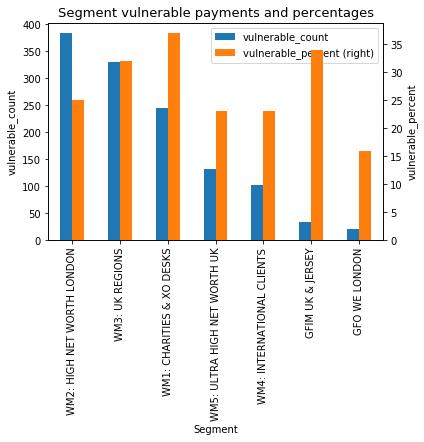

In [20]:
Vanerable_payments_number = Payments_by_segment.drop(['all_individual_count'], axis=1)
Vanerable_payments_number.set_index('Segment', inplace=True)
plt.figure()
ax=Vanerable_payments_number.plot(kind='bar', secondary_y=['vulnerable_percent'])
ax.set_ylabel('vulnerable_count')
ax.right_ax.set_ylabel('vulnerable_percent')
ax.set_title('Segment vulnerable payments and percentages', fontsize=13)
plt.show()

The plot show that in three segments the proportion of payments made by vulnerable client was relatively high. In GFIM UK & JERSEY segment, the overall volume was low. Nonetheless, it might be work while investigating further in the other two segment to confirm adequate measures to ensure clients were being fairly treated and their interest were protected when process this payment result. Control functions might also consider skewing their samples cover more payments from these segments when verifying that payments were duly authenticated and there were not fraudulent instructions. 

#### Count of payment by vulnerable clients per desk
The analysis of the payment at segment level might be too high level for anyone needing to investigate further. As such, I will look at the payments at desk level to identify if there are any notable concentrations.  The following query is looking at the distribution of payment across desks.

In [21]:
Payment_count = pd.read_sql_query("""
SELECT d.Desk, 
    COUNT(c.Payment_type) as number_of_payments,
    SUM(c.GBP_Payment_Amount) as Total_payments,
    ROUND(AVG(c.GBP_Payment_Amount),2) as Average_transaction_payment
FROM ClientPayments c
LEFT OUTER JOIN details d
ON c.Account_id=d.Account_id
LEFT OUTER JOIN PandemicDetails p
ON d.Country_ISO_codes=p.Country_ISO_codes
WHERE COVID19_Deaths_Country_Rank <=15 AND 
(julianday(c.Value_Date) - julianday(d.DOB))/365 >= 65 AND 
d.Client_type = 'Individual'
GROUP BY d.Desk
ORDER BY number_of_payments DESC
""", conn)
Payment_count.head(10)

Desk  number_of_payments  Total_payments  \
0        PWM_2                 194      9584472.67   
1     Affluent                 118      3894019.70   
2    Edinburgh                 105      8237936.66   
3        PWM_4                  98      6015003.01   
4        PWM_3                  92      9236984.25   
5  Maintenance                  65      5246425.25   
6        Leeds                  62      1649020.92   
7          ExO                  60      2394262.72   
8   Birmingham                  52      1203187.45   
9       UHNW_4                  48     14285389.75   

   Average_transaction_payment  
0                     49404.50  
1                     33000.17  
2                     78456.54  
3                     61377.58  
4                    100402.00  
5                     80714.23  
6                     26597.11  
7                     39904.38  
8                     23138.22  
9                    297612.29

I am using `pandas.plot.bar` to create a barplot on the resulting dataframe. I will create a barplot with custom options to observe the distributions of payments by desks.

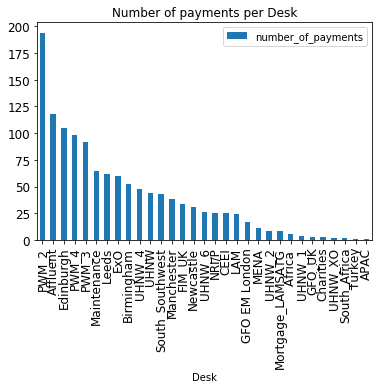

In [22]:
ax = Payment_count.plot.bar(x='Desk',y='number_of_payments', 
                          fontsize=12,
                         title = "Number of payments per Desk")

The PWM 2 had the highest count of payments which were approaching to double the next highest as there looks like an outlier. It might be worthwhile to look as why  they had a high number of payments and whether this fits in the clients' activity profiles.

##### Writing the file to excel 
I am writing the file in excel to facilitate further analysis and to also share the result of queries with my teams members and other control functions so that they can leverage when completing their own review of payments. This provides an opportunity for collaborating.

In [23]:
Payment_count.to_excel('Payments_count_by_desk.xlsx', sheet_name='Payments', index = False, header=True) # writing the Payment_count dataframe to excel 

#### Vulnerable client accounts with payments count 10 or more
Having looked at the distribution of payments at both segment and desk level, I have turned my focus to vulnerable clients with at least 10 payments made in the two and half month period under review. Looking at such granular level will provide detail on the skewing the numbers and who had significant exposure because of the value of payments processed.  

In [24]:
Payments_by_clients = pd.read_sql_query("""
SELECT d.Client_id, COUNT(c.Payment_id) as number_of_payments,
    SUM(c.GBP_Payment_Amount) as Total_payments,
    ROUND(AVG(c.GBP_Payment_Amount),2) as Average_transaction_payment
FROM ClientPayments c
LEFT OUTER JOIN details d
ON c.Account_id=d.Account_id
LEFT OUTER JOIN PandemicDetails p
ON d.Country_ISO_codes=p.Country_ISO_codes
WHERE COVID19_Deaths_Country_Rank <=5 AND 
(julianday(c.Value_Date) - julianday(d.DOB))/365 >=65  AND 
d.Client_type = 'Individual'
GROUP BY d.Client_id
HAVING COUNT(c.Payment_id) >= 10
ORDER BY number_of_payments DESC
""", conn)
Payments_by_clients

Client_id  number_of_payments  Total_payments  Average_transaction_payment
0        6992                  27        98889.39                      3662.57
1         130                  24       256093.78                     10670.57
2       23237                  23       235453.76                     10237.12
3       29426                  16       184067.23                     11504.20
4       28375                  15       292920.99                     19528.07
5        3365                  15       745642.21                     49709.48
6         125                  15       445045.57                     29669.70
7       12157                  12       864936.23                     72078.02
8        6474                  12       295082.89                     24590.24
9        8260                  11       222313.32                     20210.30
10      12158                  10        54576.09                      5457.61
11       8158                  10      1322238.66                    132223.87

I am using `matplotlib.pyplot` to create a barplot on the resulting dataframe. I will create a twin barplot with custom options to observe the distributions of the number and value payments for clients with 25 transactions or more.

<Figure size 432x288 with 0 Axes>

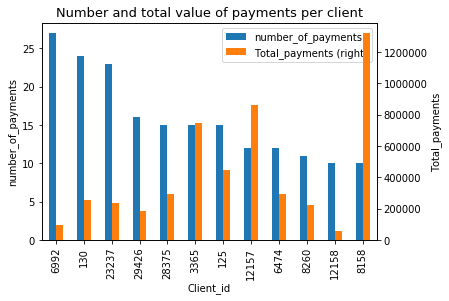

In [25]:
# Create a twin barplot with custom options to observe the distributions of payments for client with 25 transaction or more 
Client_payments = Payments_by_clients.drop(['Average_transaction_payment'], axis=1)
Client_payments.set_index('Client_id', inplace=True)
plt.figure()
ax=Client_payments.plot(kind='bar', secondary_y=['Total_payments'])
ax.set_ylabel('number_of_payments')
ax.right_ax.set_ylabel('Total_payments')
ax.set_title('Number and total value of payments per client', fontsize=13)
plt.show()

Although the top three clients by payments counts had more than 20 payment executed on their accounts (i.e. client can have multiple accounts), the payments processed in their accounts are below an equivalent of £11,000. However, one client had transaction averaging over an equivalent of £132,000. This is a clear outlier and I might need to review some of the payments made on the client's account to identify whether there has been activities out of the ordinary. Such review will include understanding the client's transaction profile and usual account activities. There are two other clients with transaction averaging approximately an equivalent of £50,000. Their account transaction can also be followed up as part of the exercise.

##### Writing the file to excel 
I am writing the file in excel to facilitate further analysis and to also share the result of queries with my teams members and other control functions.

In [26]:
# writing the Payment_count dataframe to excel 
Payments_by_clients.to_excel('Payments_by_clients.xlsx', sheet_name='Payments', index = False, header=True)

### 5. Conclude on the findings 
SQL queries provide a quick and efficient retrieve a large amount of records from a database. It also better operational value and performance when comparing to operating directly in excel. I have used SQL to run queries and analyse the result of payment on client accounts (particularly those considered vulnerable during the period impacted by coronavirus).  The results show some skewness of payment to particular segments, desk and clients and will be a good starting point for anyone wishing to investigate further into outlier cases. This is important given that the fair treatment of vulnerable client in high on the financial regulators' agenda. I will discuss and share the results of the queries obtained from this database with Group Internal Audit (GIA) management and my key contacts in the two control functions (Compliance and Business Risk Origination). The queries developed are re-usable in the future and can be used by:
*	control functions identify which desks and transactions to focus on when checking if payments transaction are being executed per UBS standards and clients are receive fair outcomes.  
*	GIA to (i) continuously monitor the development of the payments risk indicators with a view to making a decision on whether to trigger accelerating conducting an audit review if the risk indicators are deteriorating and (ii) identify transactions concentrations  that need be reviewed and tested during audit projects.

#### Project limitation
Whilst the project can highlight potential outlier cases, the conclusions as whether these are outside the expected transactional patterns can only be reach after review the documented client and activity on the client files. As such, the results of the analysis alone cannot be use to decide with transactions are fraudulent or suspicious.

#### Operationalisation
I will work with the GIA automation team to get the Jupyter Notebook developed during this project to be published on the GIA library so that it is accessible to all auditors who need to run these queries and use the results in their audits. Alternatively, the codes develop can be automated in AudRI (Audit Robotic Intelligence), which a virtual team-mate that auditors can communicate to via emails. Specific query results can be requested via email once the queries have been automation in AudRI.

#### Other factors to consider during operationalising 
As part of operationalisation, I would also consider whether the outliers can be linked with other factors which are indicative of unusual client account activity such as:
*	Changes in static data (email, phone, address) which might be potential indication that a clients' records where compromised 
*	Changes into more aggressive investment risk tolerance which might overall impact client outcomes and may raise question on fair treatment of clients
*	missing records of any reported recent client contact which might indicate a dormant account which is not expected to have transactions.

This will help narrow down potential problem accounts.

#### Other potential use cases
Some of the queries developed here can be leveraged for analysing other transactions types such as investments, asset transfers request and loan drawdowns 

Project Author: `BRICE MUSENDO`